<a href="https://colab.research.google.com/github/SafaaFathii/Numerical-Optimization-GD/blob/main/notebooks/AdaGradGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(columns=["X","Y"])
df["X"] = np.linspace(0,20)
df["Y"] = -1*df["X"]+2
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True , drop=True)
df.head()

,X,Y
0,12.244898,-10.244898
1,4.081633,-2.081633
2,9.795918,-7.795918
3,8.979592,-6.979592
4,17.959184,-15.959184


AdaGrad Batch Gradient Descent

In [ ]:
def AdaGrad_Batch_GD(df,alpha,eps):
  theta_0 = 0
  theta_1 =0
  vt0 = 0
  vt1 = 0
  Cost_List = []
  theta_0_List = []
  theta_1_List = []
  for i in range(1000):
    theta_0_List.append(theta_0)
    theta_1_List.append(theta_1)
    df["Y_Predict"] = theta_0 + theta_1 * df["X"]
    Cost = sum(np.power(df["Y_Predict"]-df["Y"] , 2)) / (2*df.shape[0])
    Cost_List.append(Cost)
    G_Theta_0 = sum(df["Y_Predict"]-df["Y"])/df.shape[0]
    G_Theta_1 = sum((df["Y_Predict"] - df["Y"])*df["X"])/df.shape[0]
    vt0 += (G_Theta_0)**2
    vt1 += (G_Theta_1)**2
    theta_0 -= (alpha * G_Theta_0)/(math.sqrt(vt0)+eps)
    theta_1 -= (alpha * G_Theta_1)/(math.sqrt(vt1)+eps)
  return theta_0_List,theta_1_List,Cost_List,theta_0,theta_1

In [ ]:
theta_0_List,theta_1_List,Cost_List,theta_0,theta_1 = AdaGrad_Batch_GD(df,0.1,1e-8)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df["Y"], df["Y_Predict"]))

0.9933828333566689


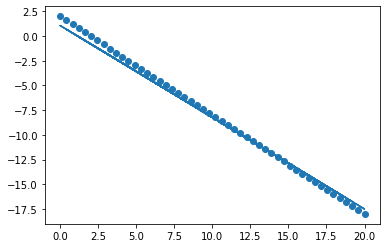

In [ ]:
ax = plt.axes()
ax.scatter(df["X"],df["Y"])
ax.plot(df["X"],df["Y_Predict"])
plt.show()

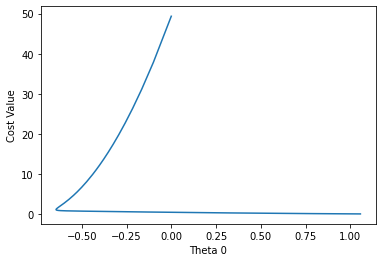

In [ ]:
plt.plot(theta_0_List,Cost_List)
plt.xlabel("Theta 0")
plt.ylabel("Cost Value")
plt.show()

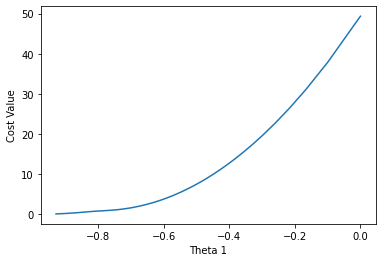

In [ ]:
plt.plot(theta_1_List,Cost_List)
plt.xlabel("Theta 1")
plt.ylabel("Cost Value")
plt.show()

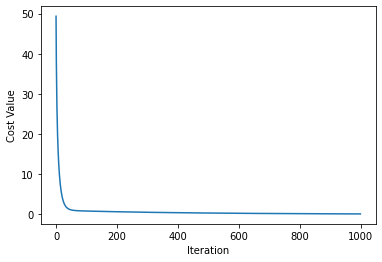

In [ ]:
plt.plot(range(len(Cost_List)),Cost_List)
plt.xlabel("Iteration")
plt.ylabel("Cost Value")
plt.show()

AdaGrad Single MiniBatch

In [ ]:
df2 = pd.DataFrame(columns=["X","Y"])
df2["X"] = np.linspace(0,20)
df2["Y"] = -1*df2["X"]+2
from sklearn.utils import shuffle
df2 = shuffle(df2)
df2.reset_index(inplace = True , drop=True)
df2.head()

,X,Y
0,2.448980,-0.448980
1,6.530612,-4.530612
2,13.877551,-11.877551
3,19.591837,-17.591837
4,8.163265,-6.163265


In [ ]:
def AdaGrad_Single_MiniBatch(df3,alpha,eps):
    theta_0 = 0
    theta_1 = 0
    theta0List = []
    theta1List = []
    CostList = []
    vt0 = 0
    vt1 = 0
    CostPrev = 0
    batchSize = len(df3)//5
    end = False
    for i in range(200):
      for j in range(0,df3.shape[0],batchSize):
        theta0List.append(theta_0)
        theta1List.append(theta_1)
        df3.loc[j:j+batchSize-1,"Y_Predict"]= theta_0+theta_1*df3.loc[j:j+batchSize-1,"X"]
        Cost = sum(( df3.loc[j:j+batchSize-1,"Y_Predict"]- df3.loc[j:j+batchSize-1,"Y"])**2)/(2*batchSize)
        CostList.append(Cost) 
        Gradient_Theta_0 = sum(df3.loc[j:j+batchSize-1,"Y_Predict"] - df3.loc[j:j+batchSize-1,"Y"])/batchSize
        Gradient_Theta_1 = sum((df3.loc[j:j+batchSize-1,"Y_Predict"] - df3.loc[j:j+batchSize-1,"Y"]) * df3.loc[j:j+batchSize-1,"X"])/batchSize

        vt0 += (Gradient_Theta_0)**2
        vt1 += (Gradient_Theta_1)**2
        theta_0 -= (alpha * Gradient_Theta_0)/(math.sqrt(vt0)+eps)
        theta_1 -= (alpha * Gradient_Theta_1)/(math.sqrt(vt1)+eps)

      if abs(Cost - CostPrev)<0.001:
        end = True
      else:
        CostPrev = Cost   
      if end:
        break
    return theta0List,theta1List,CostList,theta_0,theta_1

In [ ]:
theta_0_List,theta_1_List,Cost_List,theta_0,theta_1 = AdaGrad_Single_MiniBatch(df2,0.1,1e-8)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df2["Y"], df2["Y_Predict"]))

0.9918948579805301


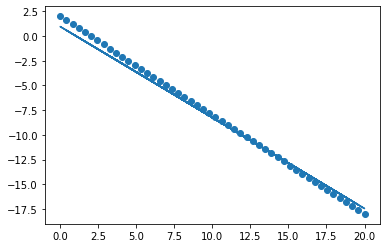

In [ ]:
ax = plt.axes()
ax.scatter(df2["X"],df2["Y"])
ax.plot(df2["X"],df2["Y_Predict"])
plt.show()

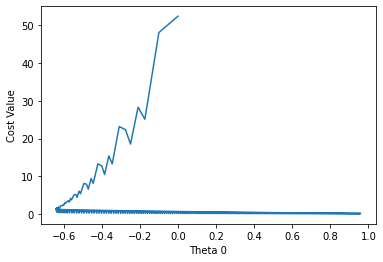

In [ ]:
plt.plot(theta_0_List,Cost_List)
plt.xlabel("Theta 0")
plt.ylabel("Cost Value")
plt.show()

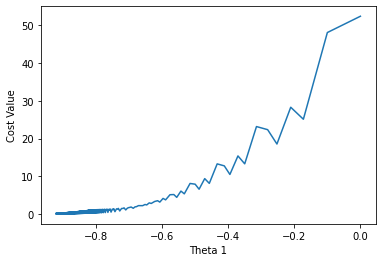

In [ ]:
plt.plot(theta_1_List,Cost_List)
plt.xlabel("Theta 1")
plt.ylabel("Cost Value")
plt.show()

AdaGrad Single Stochastic

In [ ]:
df3 = pd.DataFrame(columns=["X","Y","Y_Predict"])
df3["X"] = np.linspace(0,20)
df3["Y"] = -1*df3["X"]+2
from sklearn.utils import shuffle
df3 = shuffle(df3)
df3.reset_index(inplace = True , drop=True)
df3.head()

,X,Y,Y_Predict
0,5.306122,-3.306122,NaN
1,10.612245,-8.612245,NaN
2,13.877551,-11.877551,NaN
3,13.061224,-11.061224,NaN
4,12.244898,-10.244898,NaN


In [ ]:
def AdaGrad_Single_Stochastic(df2,alpha,eps):
  theta_0 = 0
  theta_1 = 0
  theta0List = []
  theta1List = []
  CostList = []
  vt0 = 0
  vt1 = 0
  CostPrev = 0
  end = False
  for i in range(10000):
    for j in range(df2.shape[0]):
      maxIter= i*j
      theta0List.append(theta_0)
      theta1List.append(theta_1)
      df2.loc[j,"Y_Predict"] = theta_0+theta_1*df2.loc[j,"X"]
      Cost = ((df2.loc[j,"Y_Predict"] - df2.loc[j,"Y"])**2)/2   
      CostList.append(Cost)   
      Gradient_Theta_0 = df2.loc[j,"Y_Predict"] - df2.loc[j,"Y"]
      Gradient_Theta_1 = (df2.loc[j,"Y_Predict"] - df2.loc[j,"Y"])*df2.loc[j,"X"]
      vt0 += (Gradient_Theta_0)**2
      vt1 += (Gradient_Theta_1)**2
      theta_0 -= (alpha * Gradient_Theta_0)/(math.sqrt(vt0)+eps)
      theta_1 -= (alpha * Gradient_Theta_1)/(math.sqrt(vt1)+eps)
    if abs(Cost - CostPrev)<0.001:
        end = True
    else:
      CostPrev = Cost   
    if end:
      break
  return theta0List,theta1List,CostList,theta_0,theta_1



In [ ]:
theta_0_List,theta_1_List,Cost_List,theta_0,theta_1 = AdaGrad_Single_Stochastic(df3,0.1,1e-8)


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df3["Y"], df3["Y_Predict"]))

0.9989723429339891


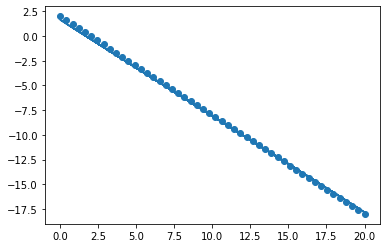

In [ ]:
ax = plt.axes()
ax.scatter(df3["X"],df3["Y"])
ax.plot(df3["X"],df3["Y_Predict"])
plt.show()

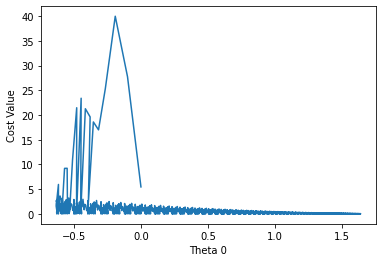

In [ ]:
plt.plot(theta_0_List,Cost_List)
plt.xlabel("Theta 0")
plt.ylabel("Cost Value")
plt.show()

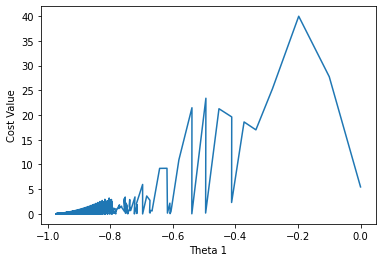

In [ ]:
plt.plot(theta_1_List,Cost_List)
plt.xlabel("Theta 1")
plt.ylabel("Cost Value")
plt.show()

AdaGrad Multi MiniBatch

In [ ]:
df4 = pd.read_csv("MultipleLR.csv",names = ["X1","X2","X3","Y"])
from sklearn.utils import shuffle
df4 = shuffle(df4)
df4.reset_index(inplace = True , drop=True)
df4.head()

,X1,X2,X3,Y
0,73,66,70,142
1,93,88,93,185
2,70,73,78,148
3,89,91,90,180
4,69,70,73,141


In [ ]:
def AdaGrad_Multi_MiniBatch(df3,alpha,eps):
    thetas = np.array([0,0,0,0],dtype = np.float64)
    Vts = np.array([0,0,0,0],dtype = np.float64)
    df3.insert(loc = 0,column = "X0",value = 1)
    predictors= list(df3.iloc[:,:4].columns)
    CostList = []
    CostPrev = 0
    batchSize = len(df3)//5
    end = False
    for i in range(200):
      for j in range(0,df3.shape[0],batchSize):
        df3.loc[j:j+batchSize-1,"Y_Predict"]= df3.loc[j:j+batchSize-1,predictors].dot(thetas)
        Cost = sum(( df3.loc[j:j+batchSize-1,"Y_Predict"]- df3.loc[j:j+batchSize-1,"Y"])**2)/(2*batchSize)
        CostList.append(Cost) 
        GradientList= []
        for k in predictors:
            GradientList.append(sum(( df3.loc[j:j+batchSize-1,"Y_Predict"] - df3.loc[j:j+batchSize-1,"Y"])*df3.loc[j:j+batchSize-1,k])/batchSize)

        Vts = Vts + np.array(GradientList)**2
        thetas = thetas - (alpha * np.array(GradientList))/((Vts**0.5)+eps)

      if abs(Cost - CostPrev)<0.001:
        end = True
      else:
        CostPrev = Cost   
      if end:
        break
    return CostList,thetas

In [ ]:
CostList,thetas = AdaGrad_Multi_MiniBatch(df4,0.1,1e-8)


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df4["Y"], df4["Y_Predict"]))

0.9793078743492977


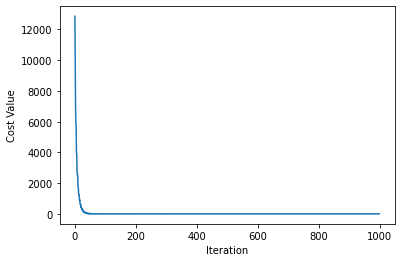

In [ ]:
plt.plot(range(len(CostList)),CostList)
plt.xlabel("Iteration")
plt.ylabel("Cost Value")
plt.show()

AdaGrad Multi Stochastic

In [ ]:
df5 = pd.read_csv("MultipleLR.csv",names = ["X1","X2","X3","Y"])
from sklearn.utils import shuffle
df5 = shuffle(df5)
df5.reset_index(inplace = True , drop=True)
df5.head()

,X1,X2,X3,Y
0,93,95,91,184
1,78,75,68,147
2,89,91,90,180
3,47,56,60,115
4,73,66,70,142


In [ ]:
def AdaGrad_Multi_Stochastic(df2,alpha,eps):
  thetas = np.array([0,0,0,0],dtype = np.float64)
  df2.insert(loc = 0,column = "X0",value = 1)
  predictors= list(df2.iloc[:,:4].columns)
  Vts = np.array([0,0,0,0],dtype = np.float64)
  CostList = []
  CostPrev = 0
  end = False
  for i in range(200):
    for j in range(df2.shape[0]):
      df2.loc[j,"Y_Predict"] = df2.loc[j,predictors].dot(thetas)
      Cost = ((df2.loc[j,"Y_Predict"] - df2.loc[j,"Y"])**2)/2   
      CostList.append(Cost)   
      GradientList= []
      for k in predictors:
        GradientList.append((df2.loc[j,"Y_Predict"]-df2.loc[j,"Y"])*df2.loc[j,k])
      Vts = Vts + np.array(GradientList)**2
      thetas = thetas - (alpha * np.array(GradientList))/((Vts**0.5)+eps)
    if abs(Cost - CostPrev)<0.001:
        end = True
    else:
      CostPrev = Cost   
    if end:
      break
  return CostList,thetas



In [ ]:
CostList,thetas = AdaGrad_Multi_Stochastic(df5,0.1,1e-8)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(df5["Y"], df5["Y_Predict"]))

0.9819589253251256


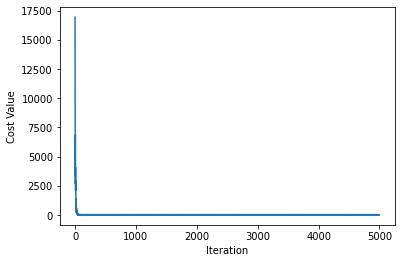

In [ ]:
plt.plot(range(len(CostList)),CostList)
plt.xlabel("Iteration")
plt.ylabel("Cost Value")
plt.show()